In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi,sqrt
from qiskit.visualization import plot_histogram

# importing Qiskit
from qiskit import *

## Quantum Fourier Transform


### Introduction

The quantum Fourier transform is the classical analogue to the direct Fourier transform (DFT). Similarly to the classical case, it is a very useful mathematical tool, and a building block in many quantum algorithms, such as quantum phase estimation, computing the discrete logarithm, and Shor's algorithm for factoring.

### Fourier Transform

In modern science and engineering, the Fourier transform is essential for signal processing and communications.

The FT allows us to extract the underlying periodic behaviour of a function, by decomposing it into its constituent frequencies.

#### Example


<img src="img/ft.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="300 px" align="center">

<sup>**a)** Take a sinusoidal signal with high frequency noise; **b)** Apply the Fourier transform, getting a frequency spectrum; **c)** After the high-frequency components are removed, the inverse Fourier transform may be applied to give a clean set of data.</sup>

#### Discrete Fourier Transform

The DFT is a version of the Fourier transform that works on discrete data sets.

The discrete Fourier transform, $\tilde{f}$ of a discrete function, $f = f_1 , \cdots, f_N$ is given by

$$ \tilde{f}_k \equiv \frac{1}{\sqrt{N}} \sum^{N-1}_{j=0} e^{2\pi ijk/N} f_j$$

The inverse Fourier transform is expressed as

$$ f_j \equiv \frac{1}{\sqrt{N}} \sum^{N-1}_{j=0} e^{-2\pi ijk/N} \tilde{f}_k$$

With $f_j$ and $\tilde{f}_k$ being complex numbers, and indices $j, k \in \{0, 1, \cdots, N-1\}$

#### TASK

Given $f_j = \{1, 2\}$, use the DFT to calculate $\tilde{f}_k$

### Quantum Fourier tranform

Qubit states are represented by vectors of complex numbers, so it makes sense that the DFT can be applied to them.

Given a state vector:

$$ | \psi \rangle = \sum^{N-1}_{j=0} a_j |j\rangle = \begin{pmatrix}
a_0\\ 
\vdots\\ 
a_{N-1}
\end{pmatrix}$$

The DFT (which we will now call the quantum Fourier transform, or QFT) can be computed over the _amplitudes_ of the quantum state

$$ \sum_j \alpha_j |j\rangle \rightarrow \sum_k \tilde{\alpha}_k |k \rangle$$ where:

$$\tilde{\alpha}_k \equiv \frac{1}{\sqrt{N}} \sum^{N-1}_{j=0} e^{2\pi ijk/N} \alpha_k$$

Is it possible to carry out this operation physically (i.e. is the QFT linear and unitary)?

First, we observe that the amplitudes $\tilde{\alpha}_k$ are linear in the original $\alpha_j$. So there is a linear operator $\hat{F}$ which implements the transform.

**Note**: Remember a linear operator $f$ must observe the following two properties:

* Additivity: $f(x + y) = f(x) + f(y)$
* Homogeneity: $f(\alpha x) = \alpha f(x)$ for all $\alpha$

We can write the matrix $\hat{F}$ in outer product notation:

$$\hat{F} = \sum_{j,k=0}^{N-1} \frac{e^{2\pi ijk/N}}{\sqrt{N}} |k \rangle \langle j |$$


#### TASK

Check that $\hat{F}$ is unitary, i.e. $\hat{F}^\dagger \hat{F} = I$, where

$$\hat{F}^{\dagger} = \sum_{j',k'=0}^{N-1} \frac{e^{-2\pi ij'k'/N}}{\sqrt{N}} |j' \rangle \langle k' | \;,\; \hat{F} = \sum_{j,k=0}^{N-1} \frac{e^{2\pi ijk/N}}{\sqrt{N}} |k \rangle \langle j |$$

#### Fourier basis

The Fourier transform lets us define a new basis $|\hat{x}\rangle = \hat{F}|x\rangle$, where $\{ |x\rangle\}$ is the usual computational basis - every vector $|\hat{x}\rangle$ is an equally weighted superposition of all the computational basis states.

**Notes**: 

* From earlier classes, recall the change of basis for a single-qubit state. What operation may be performed to change it between the computational and superposition basis?

* The Hadamard transform also turns computational basis states into equally weighted superpositions of all states. But it leaves all amplitudes real, while the amplitudes of $| \tilde{x}\rangle$ are complex. And it is its own inverse, while $\hat{F} \neq \hat{F}^\dagger$

* In physics, the relationship of this basis to the computational basis is analogous to that between the _momentum_ and _position_ bases of a particle

### QFT in the quantum circuit model of computation

For the case of $n$ qubits, the vector dimension is $N=2^n$. Since the QFT is an unitary operator, it can be implemented in a quantum circuit.

Although there is no guarantee that such a circuit would be efficient (i.e. would not scale exponentially with the number of qubits), an efficient circuit does exist.

The key is to notice that the states $| \hat{j} \rangle$ can be written in a product form:

* Let the binary expression for $j$ be $j_1 j_2 \cdots j_n$, where:

$$ j = j_1 2^{n-1} \, +\, j_2 2^{n-2} \,+\, \cdots \,+\, j_n$$

* Admit the following notation for binary fractions:

$$ 0.j_1 j_2 \cdots j_n = j_1 /2 + j_2 /4 + \cdots + j_n /2^n$$

* Then the state $|\hat{j} \rangle$ can be written as:

$$ |\hat{j} \rangle  = \frac{1}{2^n/2} (|0\rangle + e^{2\pi i 0.j_n }| 1\rangle) \, \otimes \, (|0\rangle + e^{2\pi i 0.j_{n-1}j_n }| 1\rangle) \, \otimes \, \cdots \, \otimes \, (|0\rangle + e^{2\pi i 0.j_1j_2\cdots j_n }| 1\rangle)$$


A unitary that performs the transformation

$$ |0\rangle \rightarrow \frac {1}{\sqrt{2}}(|0\rangle + e^{i\theta}|1\rangle) \; ;\; |1\rangle \rightarrow \frac {1}{\sqrt{2}}(|0\rangle - e^{i\theta}|1\rangle)$$

may be decomposed into an Hadamard gate followed by a $Z$-rotation by $\theta$.

**However**, in the expression above, the rotation depends on the values of other bits. We can expect to build the QFT out of Hadamards and controlled-phase rotation gates.

<img src="img/qft_circ.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="700 px" align="center">


**Phase-rotation gates**: In Qiskit, the phase rotation gate, $u1(\lambda)$, is defined as:

$$u1(\lambda) = \begin{pmatrix} 1 & 0\\ 0 & e^{i\lambda} \end{pmatrix}$$

Admit $\lambda = 2\pi/2^k$ so that we can define a rotation operator:

$$R_k = \begin{pmatrix} 1 & 0\\ 0 & e^{2\pi i /2^k} \end{pmatrix}$$

The controlled-$R_k$ gate performs this rotation only if a control qubit is $|1\rangle$ rather than $|0\rangle$:

$$CR_k = \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & e^{2\pi i /2^k} \end{pmatrix}$$

**Atention**

* In the figure above, notice the order of the input qubits (in comparison with Qiskit's circuit drawer);

* Notice how after the QFT, the qubits of the transformed state are in reverse order. What can be done to correct this?

### Implementing the QFT

**TASK** : Implement a function `qftransform (circuit, qr, swap=True)` to perform the QFT over a register `qr`. The function should be able to ignore the swapping operations at the end when called with `swap=Flase`.

In [3]:
def qftransform (circuit,qr,swap=True):
    n=qr.size
    i=0
    j=0
    while i<n:
        circuit.h(qr[i])
        k=j
        j=0
        circuit.barrier()
        while j<i:
            circuit.cu1(2*pi/(2**j),qr[i],qr[k])
            k-=1
            j+=1
        i+=1
    return  circuit
            
    

In [4]:
def qftransform1 (circuit,qr,swap=True):
    n=qr.size
    i=n-1
    j=0
    while i>=0:
        circuit.barrier()
        circuit.h(qr[i])
        j=i
        k=2
        while j>0:
            circuit.cu1(2*pi/(2**k),qr[i],qr[j-1])
            j-=1
            k+=1
            
        i-=1
    
    if(swap):
        i=0
        j=n-1
        while i<(n//2):
            circuit.swap(qr[i],qr[j])
            i+=1
            j-=1
            
    
    return  circuit

In [31]:
def input_state(circ, n):
    """special n-qubit input state for QFT that produces output 1."""
    for j in range(n):
        circ.h(j)
        circ.u1(-pi/float(2**(j)), j)
        
def qftransform2(circ, n):
    """n-qubit QFT on the qubits in circ."""
    for j in range(n):
        circ.h(j)
        for k in range(j+1,n):
            circ.cu1(pi/float(2**(k-j)), k, j)
        circ.barrier()
    swap_registers(circ, n)
    
def swap_registers(circ, n):
    for j in range(int(np.floor(n/2.))):
        circ.swap(j, n-j-1)
    return circ

In [32]:
def input_state(circ, n):
    """special n-qubit input state for QFT that produces output 1."""
    for j in range(n):
        circ.h(j)
        circ.u1(-pi/float(2**(j)), j)

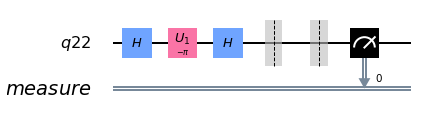

In [50]:
n=1
reg=QuantumRegister(n)

tf=QuantumCircuit(reg)
input_state(tf,n)
qftransform2(tf,n)





tf.measure_all()
tf.draw(output='mpl')


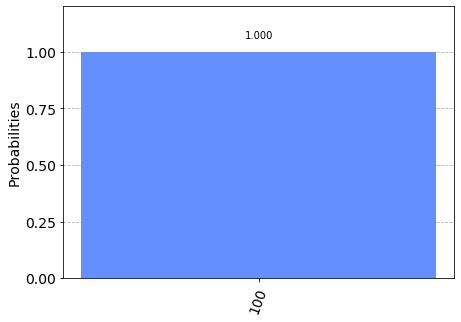

In [38]:
backend = Aer.get_backend('qasm_simulator')

job_sim = execute(tf, backend=backend, shots=8192,)
result_sim = job_sim.result()
result_counts = result_sim.get_counts(tf)
plot_histogram(result_counts)

**TASK** : Implement the inverse QFT `iqftransform (circuit, qr, swap=True)`

In [40]:
def qftransforminv (circuit,qr,swap=True):
    n=qr.size
    i=0
    j=0
    while i<n:
      
        k=2
        j=0
        circuit.barrier()
        while j<i:
            circuit.cu1(2*pi/(2**k),qr[i],qr[j])
            k+=1
            j+=1
        circuit.h(qr[i])
        i+=1
    circuit.barrier()
    if(swap):
        i=0
        j=n-1
        while i<(n//2):
            circuit.swap(qr[i],qr[j])
            i+=1
            j-=1
            
    
    return  circuit

In [104]:
def qft_dagger(circ, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(int(n/2)):
        circ.swap(qubit, n-qubit-1)
    for j in range(n,0,-1):
        k = n - j
        for m in range(k):
            circ.cu1(-pi/float(2**(k-m)), n-m-1, n-k-1)
        circ.h(n-k-1)
    
    circ.barrier()

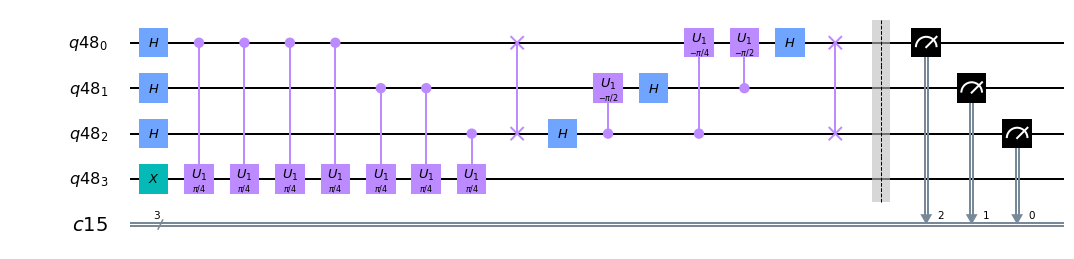

In [106]:
n=4
qreg = QuantumRegister(n)
cerg = ClassicalRegister(3)
qpe = QuantumCircuit(qreg,cerg)
qpe.x(3)

for qubit in range(n-1):
    qpe.h(qubit)
    
repetitions = 2**2
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cu1(pi/4, counting_qubit, 3); # This is C-U
    repetitions //= 2

qft_dagger(qpe,n-1)

# We measure in reverse order to correct issues later
qpe.measure(0,2)
qpe.measure(1,1)
qpe.measure(2,0)


qpe.draw(output="mpl")

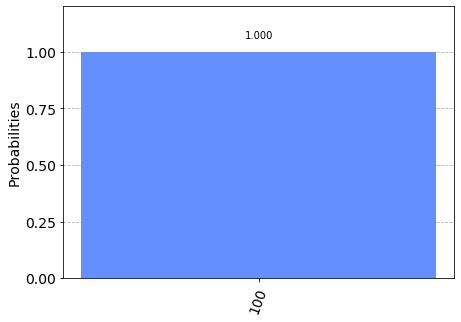

In [107]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

**Question**: How many controlled-$R_k$ gates are performed as a function of qubit number $n$? Does the circuit scale efficiently?

### Period finding

Admit a function $f(x)$ from $n$-bit numbers to $m$-bit numbers. Consider $f(x)$ periodic of period $r$, meaning that $\forall x \in \{0,\cdots,N-r-1\}$, we have that $f(x) = f(x+r)$ and the values $f(x), f(x+1), \cdots, f(x+r-1)$ are all distinct. Suppose also that $ r \leq \sqrt{N}/2$


In a quantum algorithm, this function translates to an $n$-qubit input register and an $m$-qubit output register. We can prepare in the state:

$$ | \psi_0 \rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{2^n-1} | x\rangle |0\rangle$$

Using $n$ Hadamard gates.

We then apply a circuit that performs the unitary $\hat{U}_f$:

$$\hat{U}_f | \psi_0 \rangle =\frac{1}{\sqrt{N}} \sum_{x=0}^{2^n-1} | x\rangle | f(x) \rangle$$

If we measure the output register _only_, we get a particular value $a$. The input register will be left in an evenly-weighted superposition of all $x$ such that $f(x) = a$:

$$\frac{1}{\sqrt{N/r}} \sum_{n=0}^{N/r-1} |x_0 + nr \rangle | a \rangle$$

From now on, we will ignore the output register since the measurement has fixed its state.

If we apply the QFT to the input register, we will gate a state in the form:

$$\sum_{m=0}^{r-1} \alpha_m |m N/r\rangle$$

If we now measure the input register, we would get one value $mN/r$, for some random $m$ between $0$ and $r-1$.

* This is not enough to tell us the value of $N/r$, but if we run the algorithm $d$ times, we will get a sequence of integers $m_1 N/r, \cdots, m_d N/r$ which are all multiples of $N/r$.

* For a sufficiently large number of runs $d$ (which grows moderately in $N$) we can be confident that, with high probability, $N/r$ is the only common factor of all the numbers.

In [116]:
import qiskit.aqua.components.qfts

In [118]:
construct_circuit(mode='circuit', qubits=None, circuit=None, do_swaps=True)

NameError: name 'construct_circuit' is not defined